**Cassificação Roupas**

## imports

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

# Data

## data load

In [2]:
dataset = keras.datasets.fashion_mnist
((X_train, y_train),(X_test, y_test)) = dataset.load_data()

## data exploration

In [3]:
len(X_train)

60000

Text(0.5, 1.0, '9')

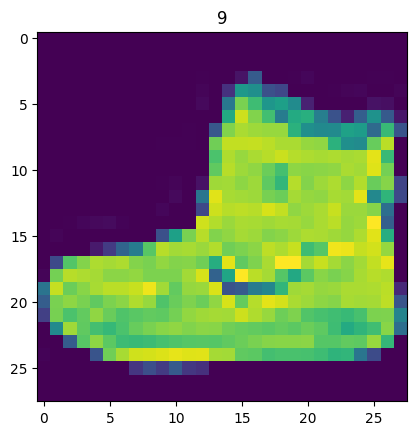

In [4]:
plt.imshow(X_train[0])
plt.title(y_train[0])

In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

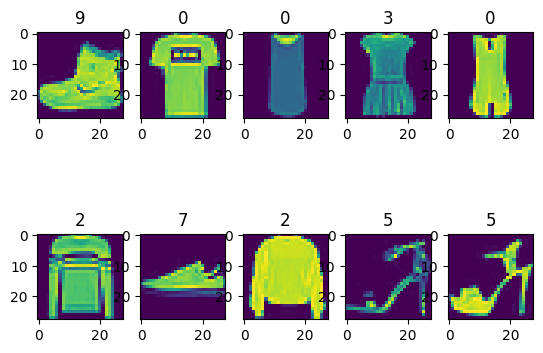

In [6]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.title(y_train[i])

In [7]:
#Labels = {'0' : 'T-shirt/top',
#         '1' :	'Trouser',
#          '2' :	'Pullover',
#          '3' : 'Dress',
#          '4' : 'Coat',
#          '5' : 'Sandal',
#          '6' : 'Shirt',
#          '7' : 'Sneaker',
#          '8' : 'Bag',
#          '9' : 'Ankle boot'}

In [8]:
labels =['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

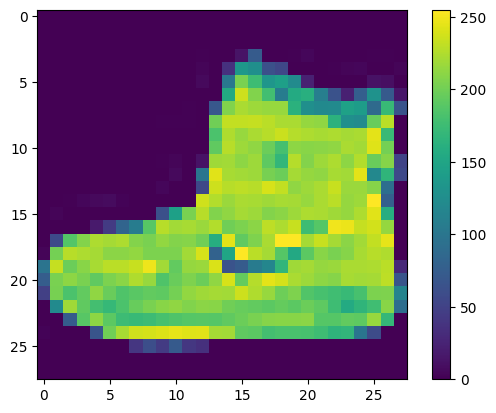

In [9]:
plt.imshow(X_train[0])
plt.colorbar()

## data visualization

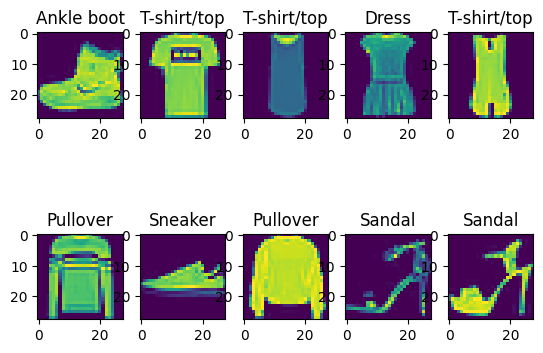

In [10]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.title(labels[y_train[i]])

# model

## normalization

In [11]:
X_train = X_train/float(255)

## creating the model

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2), #normalization
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## model compilation

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## model training

In [14]:
hist = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7648 - loss: 0.6730 - val_accuracy: 0.8547 - val_loss: 0.4050
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8524 - loss: 0.4034 - val_accuracy: 0.8549 - val_loss: 0.3858
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8660 - loss: 0.3605 - val_accuracy: 0.8683 - val_loss: 0.3577
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8755 - loss: 0.3377 - val_accuracy: 0.8753 - val_loss: 0.3419
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8807 - loss: 0.3196 - val_accuracy: 0.8860 - val_loss: 0.3181


## saving and loading the model

In [15]:
model.save('model.keras')
model_s = load_model('model.keras', custom_objects={'softmax_v2': tensorflow.nn.softmax}) # Diga ao load_model como lidar com 'softmax_v2'

## visualizing *accurency* and *loss* by epoch

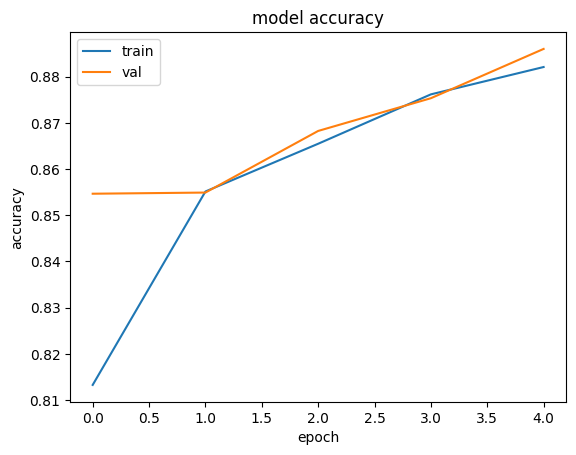

In [16]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

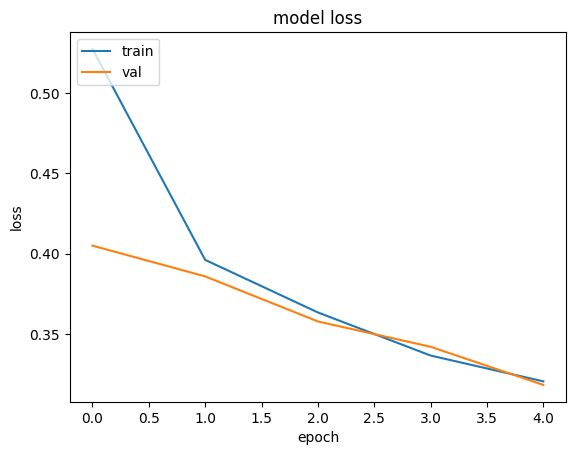

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')


## testing the model and the saved model

In [18]:
tests = model.predict(X_test)
print('result: ', np.argmax(tests[1]))
print('n img: ', y_test[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
result:  2
n img:  2


In [19]:
tests_model_s = model_s.predict(X_test)
print('S result: ', np.argmax(tests_model_s[1]))
print('S n img: ', y_test[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
S result:  2
S n img:  2


## evaluating the model

In [20]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8664 - loss: 45.7849
Test accuracy: 0.8616999983787537
Test loss: 49.56626510620117
